**Name:** Singh Lucky Santosh <br>
**Class:** TE-A <br>
**Branch:** E&TC <br>
**Roll No:** 08 <br> <br>
**Experiment No. 4**

**Statement:** Apply Basic PCA on the iris dataset. The data set is available at:

https://raw.github.com/neurospin/pystatsml/master/datasets/iris.csv

• Describe the data set. Should the dataset been standardized?

• Describe the structure of correlations among variables.

• Compute a PCA with the maximum number of components.

• Compute the cumulative explained variance ratio. Determine the number of components𝐾 by your computed values.

• Print the𝐾principal components directions and correlations of the 𝐾principal compo-nents with the original variables. Interpret the contribution of the original variables into the PC.

• Plot the samples projected into the𝐾first PCs.

• Color samples by their species.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_data = pd.read_csv("/content/iris (1).csv")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Standardization**
1. Each feature in the dataset has different mean and SD hence it is necessary to scale data for comparision with other features.

2. Standardization sets mean to zero and SD of 1 for all features.

3. As seen in the data below the SD and is different for each datasetalso the variation is different.

In [3]:
print("Sepal length range: [%s, %s]" % (min(iris_data["sepal_length"]),max(iris_data["sepal_length"])))
print("Sepal width range: [%s, %s]" % (min(iris_data["sepal_width"]),max(iris_data["sepal_width"])))
print("Petal length range: [%s, %s]" % (min(iris_data["petal_length"]),max(iris_data["petal_length"])))
print("Petal width range: [%s, %s]" % (min(iris_data["petal_width"]),max(iris_data["petal_width"])))

print("Sepal Length standard deviation :\t %f" %np.std(iris_data["sepal_length"]))
print("Sepal Width standard deviation :\t %f" %np.std(iris_data["sepal_width"]))
print("Petal Length standard deviation :\t %f" %np.std(iris_data["petal_length"]))
print("Petal Width standard deviation :\t %f" %np.std(iris_data["petal_width"]))

Sepal length range: [4.3, 7.9]
Sepal width range: [2.0, 4.4]
Petal length range: [1.0, 6.9]
Petal width range: [0.1, 2.5]
Sepal Length standard deviation :	 0.825301
Sepal Width standard deviation :	 0.434411
Petal Length standard deviation :	 1.759404
Petal Width standard deviation :	 0.759693


# **Correlation Matrix :**

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


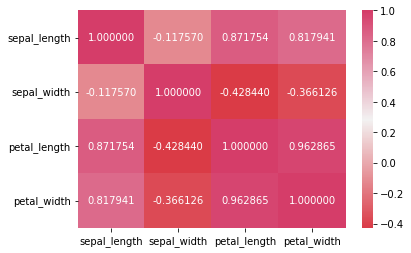

In [4]:
corr = iris_data.corr(method ="pearson")
display(corr)
sns.heatmap(corr,cmap =sns.diverging_palette(10,0,as_cmap=True),annot= True,fmt = "f")

1. Sepal_length <-> Petal_Length : 0.871754 **(Positive Correlation)**
2. Sepal_width <-> Petal_Length : -0.428440 **(Negative Correlation)**
3. Petal_length <-> Petal_width : 0.962865 **(Highly Positive Correlation)**
4. Petal_width <-> Sepal_Length : 0.817941 **(Positive Correlation)**

# **PCA (Principal Component Analysis):**

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
x_new1 =pca.fit_transform(iris_data.drop(["species"],axis =1))
x_new1[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

# **Explained Variance of R^2**

In [6]:
explained_variance= pca.explained_variance_ratio_

explained_variance

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

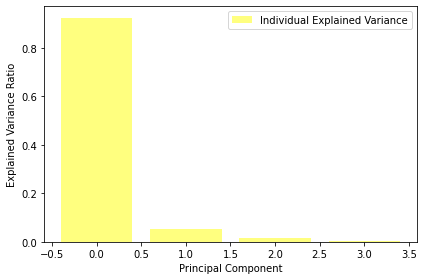

In [8]:
plt.figure(figsize =(6,4))
plt.bar(range(4),explained_variance, alpha=0.5, align='center', label ="Individual Explained Variance", color ="yellow")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.legend(loc ="best")
plt.tight_layout()

## There are 3 Principal Components. <br>
Applying PCA

In [9]:
pca  = PCA(n_components=3)
x_new =pca.fit_transform(iris_data.drop(['species'],axis =1))
x_new[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

# **Correlation and Direction of PCA**
converting categorial data to numerical

In [10]:
categ_num ={"species":{"setosa":0,"versicolor":1,"virginica":2}}
iris_data1 = iris_data.replace(categ_num)
columns = list(iris_data.columns[:4])

# **Comparing Principal Components with original variables**


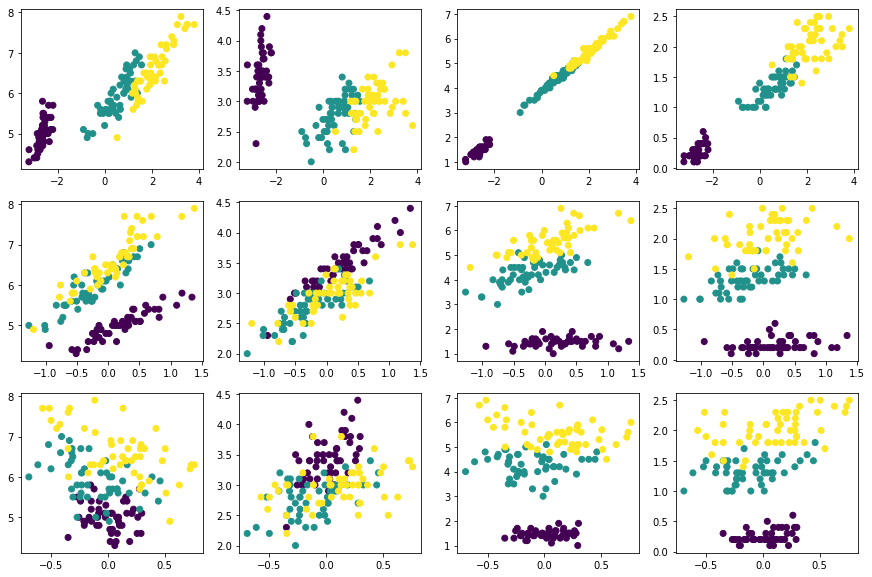

In [11]:
fig, axes =plt.subplots(3,4,figsize =(15,10))
k= 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].scatter(x_new[:,i],iris_data[columns[j]],c =iris_data1["species"])
plt.show()